In [176]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import datetime

import matplotlib.cm as cm
from windrose import WindroseAxes

%matplotlib inline

In [39]:
CTD = pd.read_csv('Z1_CTD.csv', sep = ";", parse_dates=True, index_col='Date',)

In [40]:
waves2018 = pd.read_csv("fale2018.csv", sep=";", parse_dates=True, index_col=' Date', encoding = 'unicode_escape')

In [38]:
meteo2018 = pd.read_csv("meteo2018.csv", sep=";", parse_dates=True, index_col='Date',)

In [41]:
waves2018.head()

,Hmaks / Hmax,Hm0 / Hm0,Hr / Hmean,Tp / Tp,Tsr / Tmean,Dirp / Dirp,Okres
Date,,,,,,,
2018-01-01 00:00:00,0.68,0.41,0.24,4.01,2.87,274.29,I kw.
2018-01-01 01:00:00,0.60,0.44,0.26,4.38,3.28,283.54,I kw.
2018-01-01 02:00:00,0.71,0.43,0.26,4.26,3.22,279.10,I kw.
2018-01-01 03:00:00,0.60,0.42,0.25,4.19,3.16,278.18,I kw.
2018-01-01 04:00:00,0.65,0.44,0.25,4.78,2.93,285.12,I kw.


In [42]:
waves2018.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2018-01-01 00:00:00 to 2018-12-31 23:00:00
Data columns (total 7 columns):
Hmaks / Hmax    8680 non-null float64
Hm0 / Hm0       8680 non-null float64
Hr / Hmean     8680 non-null float64
Tp / Tp         8680 non-null float64
Tsr / Tmean     8680 non-null object
Dirp / Dirp     8680 non-null float64
Okres           8760 non-null object
dtypes: float64(5), object(2)
memory usage: 547.5+ KB


In [43]:
meteo2018.head()

,Humidity,WindSpd,WindSpdMin,WindSpdMax,WindDir,AirTem,AirPres Vaisala,Okres
Date,,,,,,,,
2018-01-01 00:00:00,100.0,6.48,5.23,8.98,215.8,8.26,996.01,I kw.
2018-01-01 01:00:00,100.0,4.34,3.22,5.77,223.4,8.00,995.62,I kw.
2018-01-01 02:00:00,100.0,6.18,4.63,8.29,205.9,8.46,995.27,I kw.
2018-01-01 03:00:00,100.0,7.30,5.28,9.79,205.2,8.59,994.92,I kw.
2018-01-01 04:00:00,100.0,8.15,5.92,10.34,209.3,8.71,994.40,I kw.


In [44]:
CTD.head()

,Pressure_b,Temperature_b,Salinity_b,Pressure_b.1,Temperature_b.1,Salinity_b.1,Pressure_b.2,Temperature_b.2,Salinity_n
Date,,,,,,,,,
2017-04-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-30 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-30 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-30 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-30 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
CTD_2018 = CTD['2018']

In [55]:
CTD_2018.head()

,Pressure_b,Temperature_b,Salinity_b,Pressure_b.1,Temperature_b.1,Salinity_b.1,Pressure_b.2,Temperature_b.2,Salinity_n
Date,,,,,,,,,
2018-01-01 00:00:00,16.46,4.70,7847.78,1.45,4.50,7519.49,8.64,4.63,7512.458140
2018-01-01 01:00:00,16.46,4.71,7843.06,1.44,4.51,7518.08,8.64,4.64,7508.979961
2018-01-01 02:00:00,16.43,4.71,7832.22,1.44,4.53,7524.74,8.63,4.64,7510.054042
2018-01-01 03:00:00,16.39,4.70,7830.98,1.43,4.54,7522.22,8.63,4.65,7512.291860
2018-01-01 04:00:00,16.39,4.71,7835.94,1.43,4.54,7521.23,8.63,4.65,7509.494304


In [60]:
CTD_2018.columns = ["Pressure_bottom","Temperature_bottom", "Salinity_bottom", "Pressure_1","Temperature_1","Salinity_1","Pressure_2","Temperature_2","Salinity_2" ]

In [97]:
waves2018.columns

Index(['Hmaks / Hmax', 'Hm0 / Hm0', 'Hr / Hmean', 'Tp / Tp', 'Tsr / Tmean',
       'Dirp / Dirp', 'Okres'],
      dtype='object')

In [98]:
waves2018.columns = ["Hmax","H0", "Hmean", "Tp","Tmean","Dir","Okres"]

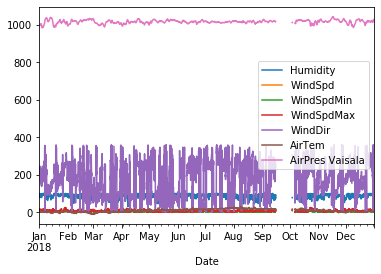

In [52]:
meteo2018.plot();
monthly = meteo2018.resample('M').sum()

In [65]:
CTD_2018.describe()

,Pressure_bottom,Temperature_bottom,Salinity_bottom,Pressure_1,Temperature_1,Salinity_1,Pressure_2,Temperature_2,Salinity_2
count,8735.000000,8719.000000,8031.000000,7802.000000,7796.000000,7800.000000,7678.000000,7677.000000,7675.000000
mean,16.726267,9.075565,7451.184932,1.112952,11.243597,7432.152040,8.337858,10.824446,7433.351646
std,0.378725,6.349258,378.819671,0.490520,6.730429,102.422371,0.450314,6.530571,80.262205
min,0.470000,0.440000,6534.760000,-0.380000,0.370000,6781.970000,5.889178,0.530000,6964.525616
25%,16.500000,3.950000,7221.995000,0.960000,4.766801,7379.130000,7.950000,4.830000,7389.301037
50%,16.710000,6.980000,7543.610000,1.030000,10.769889,7454.494244,8.406819,10.490000,7442.100000
75%,16.965000,13.920000,7764.225000,1.430000,17.280000,7492.705000,8.687444,16.853833,7478.600000
max,17.860000,23.650000,9166.300000,2.260000,24.350000,7812.100000,9.600000,24.090000,7721.752879


In [144]:
CTD_2018['month']=CTD_2018.index.month #nie wiem jak na wykresach wykorzystać index datetimeindex

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [143]:
CTD_2018copy

,Pressure_bottom,Temperature_bottom,Salinity_bottom,Pressure_1,Temperature_1,Salinity_1,Pressure_2,Temperature_2,Salinity_2,month
Date,,,,,,,,,,
2018-01-01 00:00:00,16.46,4.70,7847.78,1.45,4.500000,7519.490000,8.64,4.63,7512.458140,1
2018-01-01 01:00:00,16.46,4.71,7843.06,1.44,4.510000,7518.080000,8.64,4.64,7508.979961,1
2018-01-01 02:00:00,16.43,4.71,7832.22,1.44,4.530000,7524.740000,8.63,4.64,7510.054042,1
2018-01-01 03:00:00,16.39,4.70,7830.98,1.43,4.540000,7522.220000,8.63,4.65,7512.291860,1
2018-01-01 04:00:00,16.39,4.71,7835.94,1.43,4.540000,7521.230000,8.63,4.65,7509.494304,1
...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,16.81,4.86,7887.98,1.69,4.605728,7635.353877,7.96,4.78,7624.588813,12
2018-12-31 20:00:00,16.78,4.84,7890.55,1.67,4.607500,7634.949100,7.96,4.77,7625.785185,12
2018-12-31 21:00:00,16.78,4.82,7890.69,1.66,4.600478,7636.576140,7.94,4.77,7625.939619,12


C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


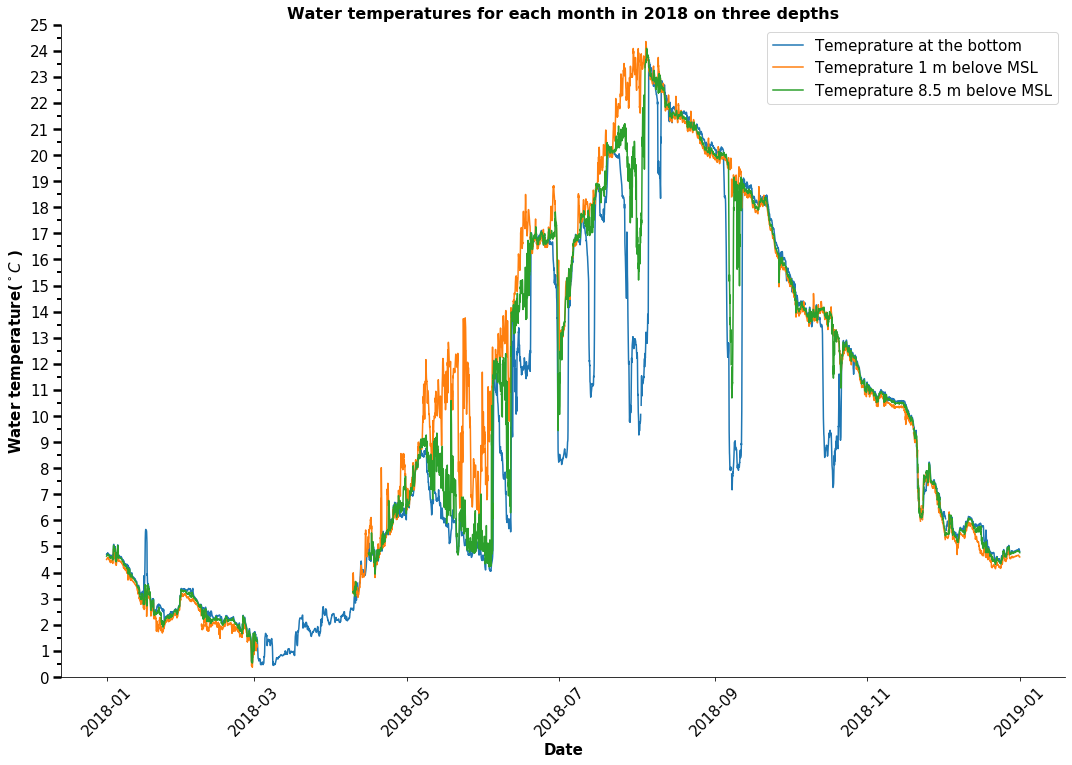

In [113]:
fig_watertemp = plt.figure(figsize=(18,12))

ax=fig_watertemp.add_subplot(111)
ax2=fig_watertemp.add_subplot(111)
ax3=fig_watertemp.add_subplot(111)

ax.spines["top"].set_visible(False)      
ax.spines["right"].set_visible(False)    

ax.plot(CTD_2018.index.values, CTD_2018['Temperature_bottom'], label="Temeprature at the bottom")
ax2.plot(CTD_2018.index.values, CTD_2018['Temperature_1'], label="Temeprature 1 m belove MSL")
ax3.plot(CTD_2018.index.values, CTD_2018['Temperature_2'], label="Temeprature 8.5 m belove MSL")

plt.title('Water temperatures for each month in 2018 on three depths',size=16, fontweight='bold') 

plt.legend(loc = 'best', fontsize=15)

plt.ylim(0, 25) 

ax.yaxis.set_minor_locator(plt.MultipleLocator(0.5))
plt.setp(ax.get_xticklabels(), rotation=45)
plt.yticks(np.arange(0,26, step=1))


plt.tick_params(axis='y', which='major', length=8, width='2.5', labelsize=15)
plt.tick_params(axis='y', which='minor', length=4, width='2', labelsize=15)
plt.tick_params(axis='x', labelsize=15)


plt.xlabel('Date', size=15, fontweight='bold')
plt.ylabel('Water temperature($^\circ C$ )',size=15, fontweight='bold') 

plt.savefig('temperature.png')

plt.show()

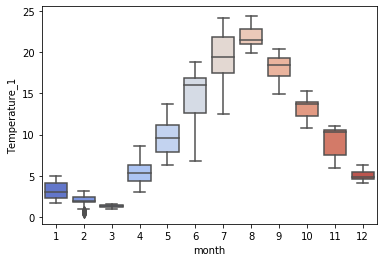

In [148]:
sns.boxplot(x="month",y = "Temperature_1", data=CTD_2018, palette="coolwarm");

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


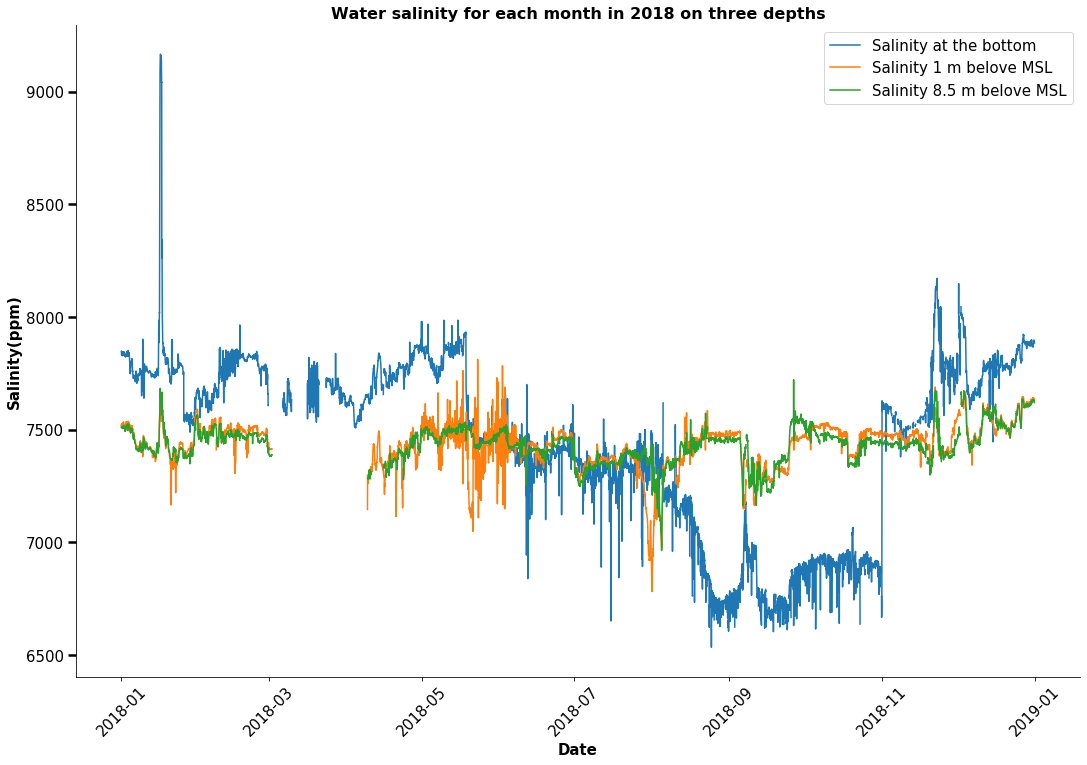

In [114]:
fig_watersalinity = plt.figure(figsize=(18,12))

ax=fig_watersalinity.add_subplot(111)
ax2=fig_watersalinity.add_subplot(111)
ax3=fig_watersalinity.add_subplot(111)

ax.spines["top"].set_visible(False)      
ax.spines["right"].set_visible(False)    


ax.plot(CTD_2018.index.values, CTD_2018['Salinity_bottom'], label="Salinity at the bottom")
ax2.plot(CTD_2018.index.values, CTD_2018['Salinity_1'], label="Salinity 1 m belove MSL")
ax3.plot(CTD_2018.index.values, CTD_2018['Salinity_2'], label="Salinity 8.5 m belove MSL")

plt.title('Water salinity for each month in 2018 on three depths',size=16, fontweight='bold') 

plt.legend(loc = 'best', fontsize=15)

#ax.yaxis.set_minor_locator(plt.MultipleLocator(0.5))
plt.setp(ax.get_xticklabels(), rotation=45)
#plt.yticks(np.arange(6500,9500, step=250))

plt.tick_params(axis='y', which='major', length=8, width='2.5', labelsize=15)
plt.tick_params(axis='y', which='minor', length=4, width='2', labelsize=15)
plt.tick_params(axis='x', labelsize=15)


plt.xlabel('Date', size=15, fontweight='bold')
plt.ylabel('Salinity(ppm)',size=15, fontweight='bold') 

plt.savefig('salinity.png')

plt.show()

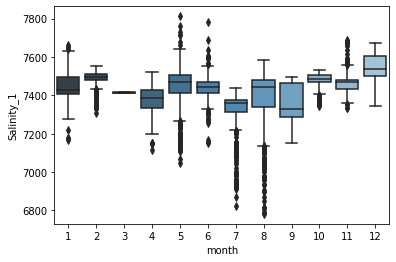

In [151]:
sns.boxplot(x="month",y = "Salinity_1", data=CTD_2018, palette="Blues_d");

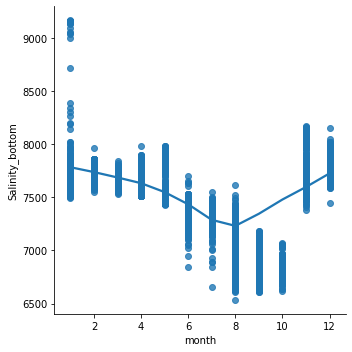

In [157]:
sns.lmplot(y="Salinity_bottom", x="month", data=CTD_2018, lowess=True);

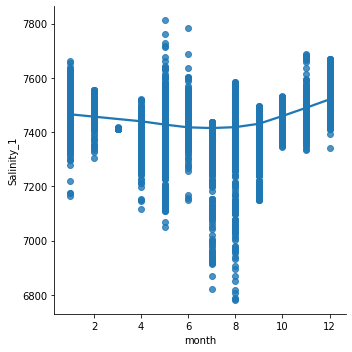

In [155]:
sns.lmplot(y="Salinity_1", x="month", data=CTD_2018, lowess=True);

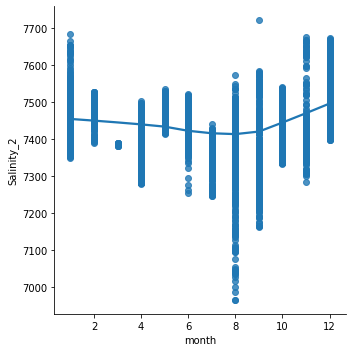

In [156]:
sns.lmplot(y="Salinity_2", x="month", data=CTD_2018, lowess=True);

In [70]:
meteo2018.head()

,Humidity,WindSpd,WindSpdMin,WindSpdMax,WindDir,AirTem,AirPres Vaisala,Okres
Date,,,,,,,,
2018-01-01 00:00:00,100.0,6.48,5.23,8.98,215.8,8.26,996.01,I kw.
2018-01-01 01:00:00,100.0,4.34,3.22,5.77,223.4,8.00,995.62,I kw.
2018-01-01 02:00:00,100.0,6.18,4.63,8.29,205.9,8.46,995.27,I kw.
2018-01-01 03:00:00,100.0,7.30,5.28,9.79,205.2,8.59,994.92,I kw.
2018-01-01 04:00:00,100.0,8.15,5.92,10.34,209.3,8.71,994.40,I kw.


In [145]:
meteo2018['month']=meteo2018.index.month

In [116]:
meteo2018.describe()

,Humidity,WindSpd,WindSpdMin,WindSpdMax,WindDir,AirTem,AirPres Vaisala
count,8252.000000,8251.000000,8251.000000,8251.000000,8251.000000,8252.000000,8255.000000
mean,87.438560,5.825581,3.808461,7.917143,177.237254,9.278169,1015.977511
std,10.927909,3.027727,2.147298,3.998823,88.191471,7.789943,9.256087
min,30.000000,0.010000,0.000000,0.650000,0.000000,-10.690000,983.710000
25%,81.000000,3.540000,2.200000,4.900000,98.500000,2.500000,1011.370000
50%,90.000000,5.410000,3.610000,7.220000,179.300000,9.095000,1016.600000
75%,96.000000,7.600000,5.230000,10.125000,249.900000,16.000000,1021.550000
max,100.000000,18.650000,12.300000,26.100000,360.000000,30.900000,1043.260000


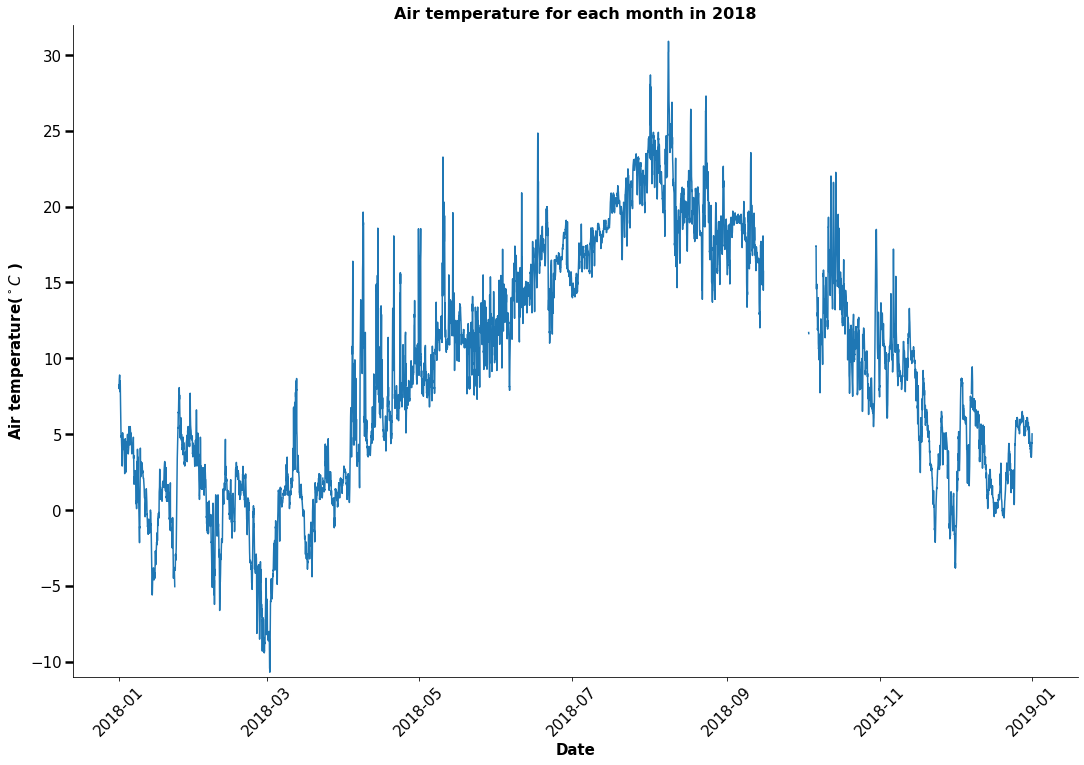

In [118]:
fig_airtemp = plt.figure(figsize=(18,12))

ax=fig_airtemp.add_subplot(111)
ax.spines["top"].set_visible(False)      
ax.spines["right"].set_visible(False)    


ax.plot(meteo2018.index.values, meteo2018['AirTem'], label="Air Temperature")

plt.title('Air temperature for each month in 2018',size=16, fontweight='bold') 

plt.ylim(-11, 32) 

#ax.yaxis.set_minor_locator(plt.MultipleLocator(0.5))
plt.setp(ax.get_xticklabels(), rotation=45)
#plt.yticks(np.arange(6500,9500, step=250))

plt.tick_params(axis='y', which='major', length=8, width='2.5', labelsize=15)
plt.tick_params(axis='y', which='minor', length=4, width='2', labelsize=15)
plt.tick_params(axis='x', labelsize=15)


plt.xlabel('Date', size=15, fontweight='bold')
plt.ylabel('Air temperature($^\circ C$ )',size=15, fontweight='bold') 

plt.savefig('air_temp.png')

plt.show()

In [165]:
#temperature anomalies - compare August with mean data 

In [ ]:
sns.set(rc={'figure.figsize':(20,20)}) 
sns.set_context('talk', font_scale=2) 
sns.set_style('ticks')
g = sns.relplot(x='temp', y='cnt', hue='Season', data=day,palette=['green','orange','brown','blue'],
                col='Season', col_wrap=2, legend=False
                height=4, aspect=1.6, style='Season', sizes=(800,1000))

g.fig.suptitle('Bike Rentals at Different Temperatures\nBy Season' ,position=(0.5,1.05), fontweight='bold', size=18)
g.set_xlabels("Normalized Temperature",fontweight='bold', size=15)
g.set_ylabels("Count of\nTotal Bike Rentals",fontweight='bold', size=20);

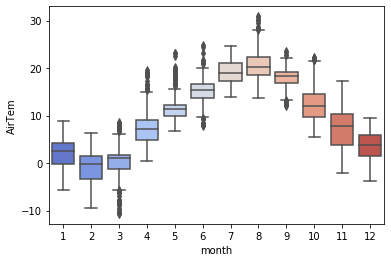

In [153]:
sns.boxplot(x="month",y = "AirTem", data=meteo2018, palette="coolwarm");

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


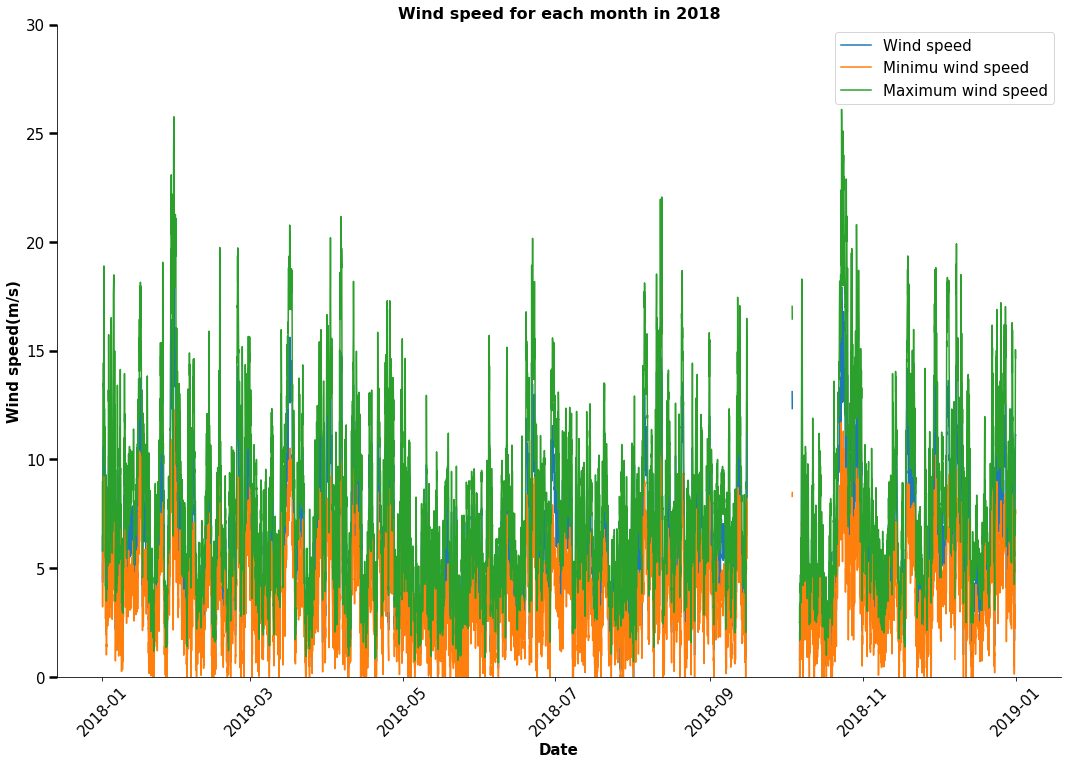

In [164]:
fig_windspeed = plt.figure(figsize=(18,12))

ax=fig_windspeed.add_subplot(111)
ax2=fig_windspeed.add_subplot(111)
ax3=fig_windspeed.add_subplot(111)

ax.spines["top"].set_visible(False)      
ax.spines["right"].set_visible(False)    


ax.plot(meteo2018.index.values, meteo2018['WindSpd'], label="Wind speed")
ax2.plot(meteo2018.index.values, meteo2018['WindSpdMin'], label="Minimu wind speed")
ax3.plot(meteo2018.index.values, meteo2018['WindSpdMax'], label="Maximum wind speed")

plt.title('Wind speed for each month in 2018',size=16, fontweight='bold') 

plt.legend(loc = 'best', fontsize=15)

#ax.yaxis.set_minor_locator(plt.MultipleLocator(0.5))
plt.setp(ax.get_xticklabels(), rotation=45)
#plt.yticks(np.arange(6500,9500, step=250))

plt.ylim(0, 30) 

plt.tick_params(axis='y', which='major', length=8, width='2.5', labelsize=15)
plt.tick_params(axis='y', which='minor', length=4, width='2', labelsize=15)
plt.tick_params(axis='x', labelsize=15)


plt.xlabel('Date', size=15, fontweight='bold')
plt.ylabel('Wind speed(m/s)',size=15, fontweight='bold') 

plt.savefig('wind.png')

plt.show()

In [76]:
meteo2018.head(5)

,Humidity,WindSpd,WindSpdMin,WindSpdMax,WindDir,AirTem,AirPres Vaisala,Okres
Date,,,,,,,,
2018-01-01 00:00:00,100.0,6.48,5.23,8.98,215.8,8.26,996.01,I kw.
2018-01-01 01:00:00,100.0,4.34,3.22,5.77,223.4,8.00,995.62,I kw.
2018-01-01 02:00:00,100.0,6.18,4.63,8.29,205.9,8.46,995.27,I kw.
2018-01-01 03:00:00,100.0,7.30,5.28,9.79,205.2,8.59,994.92,I kw.
2018-01-01 04:00:00,100.0,8.15,5.92,10.34,209.3,8.71,994.40,I kw.


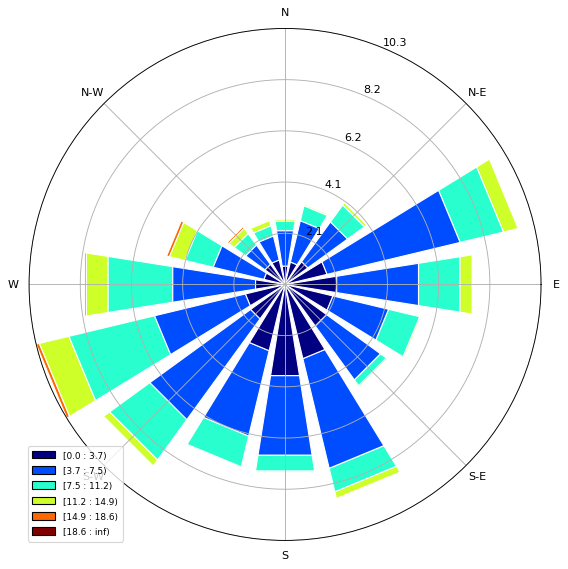

In [82]:
#windrose like a stacked histogram with normed (displayed in percent) results
ax = WindroseAxes.from_ax()
ax.bar(meteo2018.WindDir, meteo2018.WindSpd, normed=True, opening=0.8, edgecolor='white')
ax.set_legend();

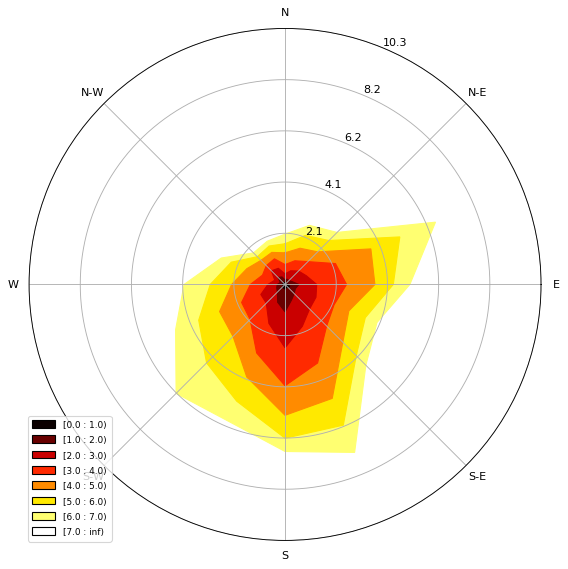

In [94]:
#A windrose in filled representation, with a controled colormap

ax = WindroseAxes.from_ax()
ax.contourf(meteo2018.WindDir, meteo2018.WindSpd, bins=np.arange(0, 8, 1),normed=True, cmap=cm.hot)
ax.set_legend();

In [147]:
waves2018.columns

Index(['Hmax', 'H0', 'Hmean', 'Tp', 'Tmean', 'Dir', 'Okres', 'month'], dtype='object')

In [146]:
waves2018['month']= waves2018.index.month

In [121]:
waves2018.describe()

,Hmax,H0,Hmean,Tp,Dir
count,8680.000000,8680.000000,8680.000000,8680.000000,8680.000000
mean,1.140615,0.739700,0.438115,4.895021,176.323516
std,0.869574,0.563246,0.339525,1.360232,128.973346
min,0.090000,0.060000,0.040000,1.420000,0.010000
25%,0.500000,0.320000,0.190000,3.990000,34.810000
50%,0.900000,0.580000,0.340000,4.810000,260.800000
75%,1.510000,0.980000,0.580000,5.760000,286.670000
max,6.690000,3.850000,2.400000,10.130000,359.970000


C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


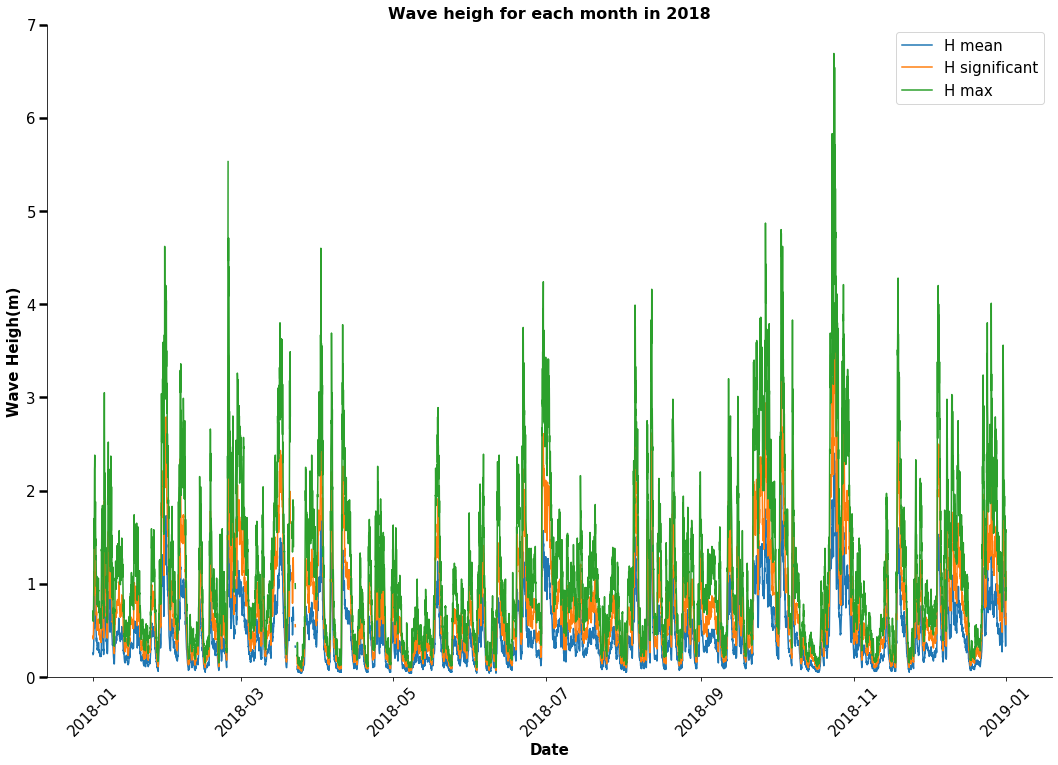

In [127]:
fig_waves = plt.figure(figsize=(18,12))

ax=fig_waves.add_subplot(111)
ax2=fig_waves.add_subplot(111)
ax3=fig_waves.add_subplot(111)

ax.spines["top"].set_visible(False)      
ax.spines["right"].set_visible(False)    


ax.plot(waves2018.index.values, waves2018['Hmean'], label="H mean")
ax2.plot(waves2018.index.values, waves2018['H0'], label="H significant")
ax3.plot(waves2018.index.values, waves2018['Hmax'], label="H max")

plt.title('Wave heigh for each month in 2018',size=16, fontweight='bold') 

plt.legend(loc = 'best', fontsize=15)

#ax.yaxis.set_minor_locator(plt.MultipleLocator(0.5))
plt.setp(ax.get_xticklabels(), rotation=45)
#plt.yticks(np.arange(6500,9500, step=250))

plt.ylim(0, 7) 

plt.tick_params(axis='y', which='major', length=8, width='2.5', labelsize=15)
plt.tick_params(axis='y', which='minor', length=4, width='2', labelsize=15)
plt.tick_params(axis='x', labelsize=15)


plt.xlabel('Date', size=15, fontweight='bold')
plt.ylabel('Wave Heigh(m)',size=15, fontweight='bold') 

plt.savefig('wave_heigh.png')

plt.show()

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


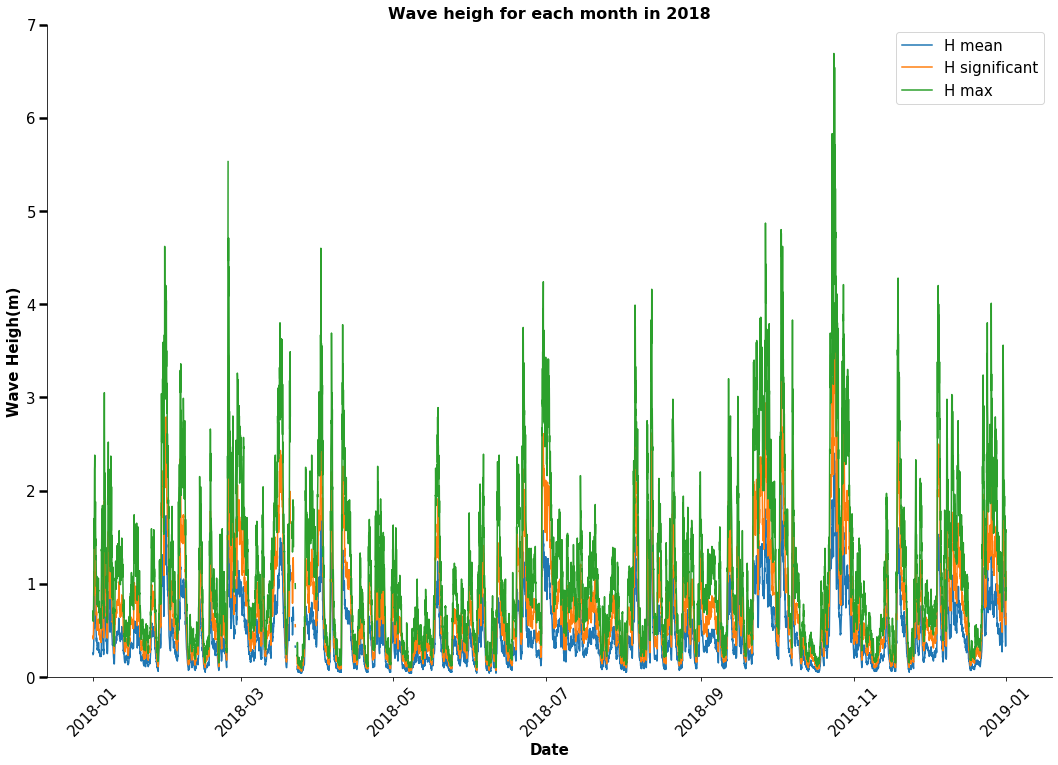

In [128]:
fig_waves = plt.figure(figsize=(18,12))

ax=fig_waves.add_subplot(111)
ax2=fig_waves.add_subplot(111)
ax3=fig_waves.add_subplot(111)

ax.spines["top"].set_visible(False)      
ax.spines["right"].set_visible(False)    


ax.plot(waves2018.index.values, waves2018['Hmean'], label="H mean")
ax2.plot(waves2018.index.values, waves2018['H0'], label="H significant")
ax3.plot(waves2018.index.values, waves2018['Hmax'], label="H max")

plt.title('Wave heigh for each month in 2018',size=16, fontweight='bold') 

plt.legend(loc = 'best', fontsize=15)

#ax.yaxis.set_minor_locator(plt.MultipleLocator(0.5))
plt.setp(ax.get_xticklabels(), rotation=45)
#plt.yticks(np.arange(6500,9500, step=250))

plt.ylim(0, 7) 

plt.tick_params(axis='y', which='major', length=8, width='2.5', labelsize=15)
plt.tick_params(axis='y', which='minor', length=4, width='2', labelsize=15)
plt.tick_params(axis='x', labelsize=15)


plt.xlabel('Date', size=15, fontweight='bold')
plt.ylabel('Wave Heigh(m)',size=15, fontweight='bold') 

plt.savefig('wave_heigh.png')

plt.show()

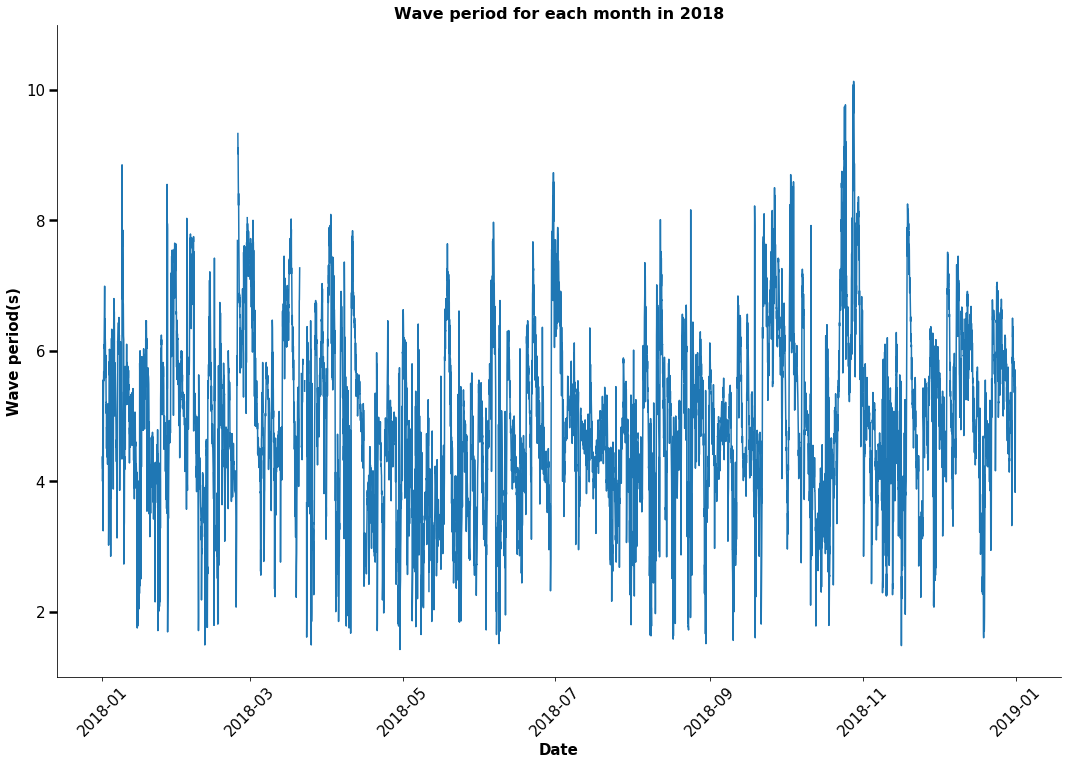

In [133]:
fig_waves_period = plt.figure(figsize=(18,12))

ax=fig_waves_period.add_subplot(111)

ax.spines["top"].set_visible(False)      
ax.spines["right"].set_visible(False)    

ax.plot(waves2018.index.values, waves2018['Tp'], label="Tp")

plt.title('Wave period for each month in 2018',size=16, fontweight='bold') 

#plt.legend(loc = 'best', fontsize=15)

#ax.yaxis.set_minor_locator(plt.MultipleLocator(0.5))
plt.setp(ax.get_xticklabels(), rotation=45)
#plt.yticks(np.arange(6500,9500, step=250))

plt.ylim(1,11) 

plt.tick_params(axis='y', which='major', length=8, width='2.5', labelsize=15)
plt.tick_params(axis='y', which='minor', length=4, width='2', labelsize=15)
plt.tick_params(axis='x', labelsize=15)


plt.xlabel('Date', size=15, fontweight='bold')
plt.ylabel('Wave period(s)',size=15, fontweight='bold') 

plt.savefig('wave_period.png')

plt.show()

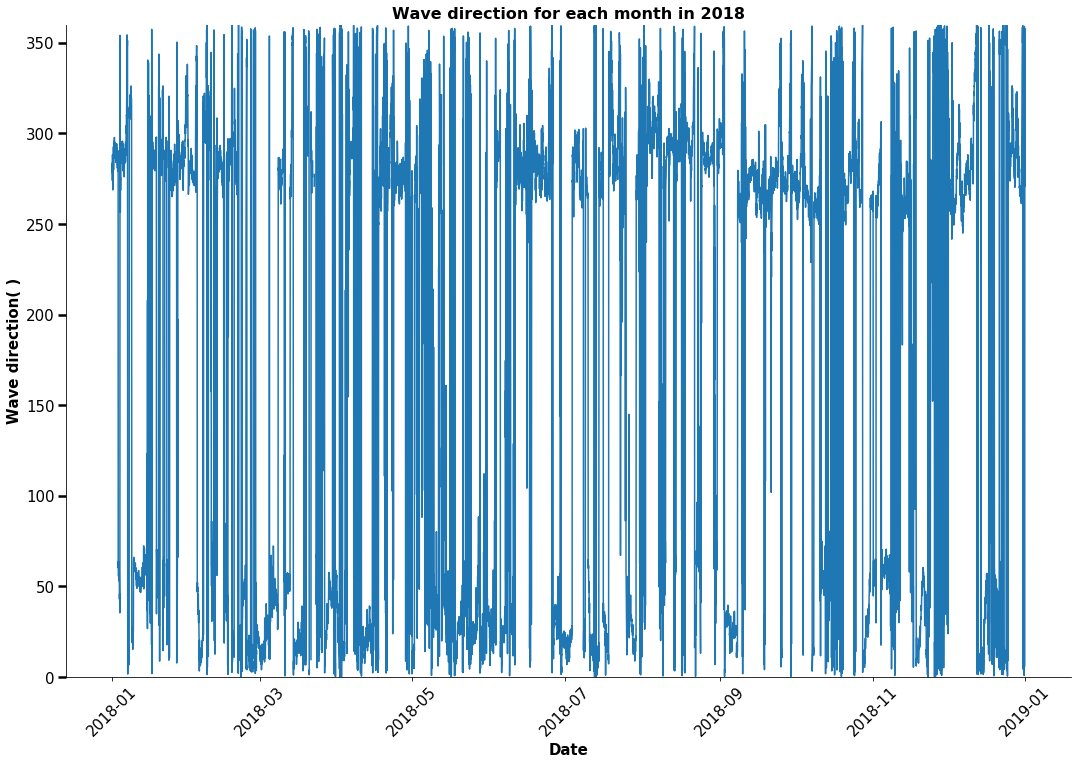

In [136]:
fig_waves_dir= plt.figure(figsize=(18,12))

ax=fig_waves_dir.add_subplot(111)

ax.spines["top"].set_visible(False)      
ax.spines["right"].set_visible(False)    

ax.plot(waves2018.index.values, waves2018['Dir'], label="Dir")

plt.title('Wave direction for each month in 2018',size=16, fontweight='bold') 

#plt.legend(loc = 'best', fontsize=15)

#ax.yaxis.set_minor_locator(plt.MultipleLocator(0.5))
plt.setp(ax.get_xticklabels(), rotation=45)
#plt.yticks(np.arange(6500,9500, step=250))

plt.ylim(0,360) 

plt.tick_params(axis='y', which='major', length=8, width='2.5', labelsize=15)
plt.tick_params(axis='y', which='minor', length=4, width='2', labelsize=15)
plt.tick_params(axis='x', labelsize=15)


plt.xlabel('Date', size=15, fontweight='bold')
plt.ylabel('Wave direction( )',size=15, fontweight='bold') 

plt.savefig('wave_direction.png')

plt.show()

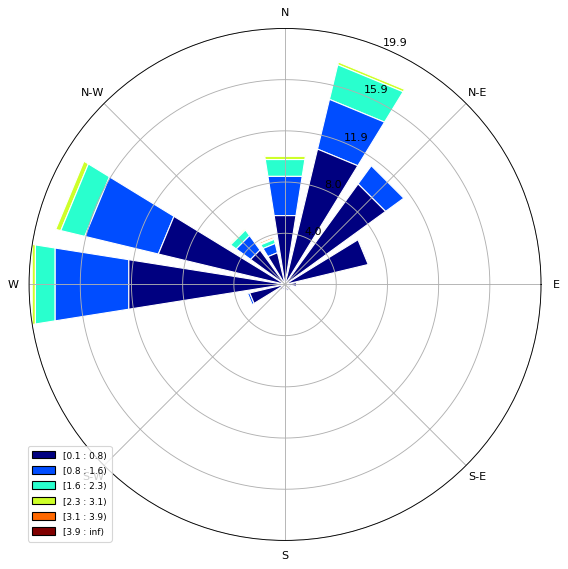

In [101]:
#windrose like a stacked histogram with normed (displayed in percent) results
ax = WindroseAxes.from_ax()
ax.bar(waves2018.Dir, waves2018.H0, normed=True, opening=0.8, edgecolor='white')
ax.set_legend();

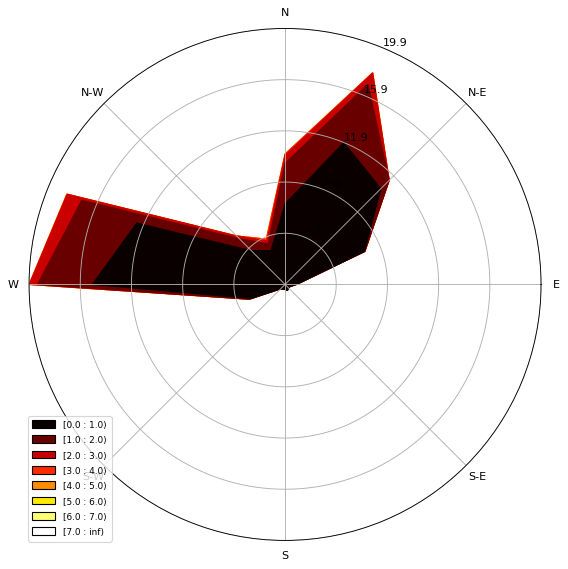

In [105]:
ax = WindroseAxes.from_ax()
ax.contourf(waves2018.Dir, waves2018.H0, bins=np.arange(0, 8, 1),normed=True, cmap=cm.hot)
ax.set_legend();

In [137]:
#Weibul distribution